In [12]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [13]:
from fastai.structured import *
from fastai.column_data import *
np.set_printoptions(threshold=50, edgeitems=20)

PATH='data/HOME_CREDIT/'

In [14]:
#n_rows = None to load all file

In [15]:
n_rows = 50000

In [16]:
train = pd.read_csv(f"{PATH}application_train.csv", nrows = n_rows )


In [127]:
test = pd.read_csv(f"{PATH}application_test.csv", nrows=n_rows)

In [17]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
train.AMT_INCOME_TOTAL

0        202500.000
1        270000.000
2         67500.000
3        135000.000
4        121500.000
5         99000.000
6        171000.000
7        360000.000
8        112500.000
9        135000.000
10       112500.000
11        38419.155
12        67500.000
13       225000.000
14       189000.000
15       157500.000
16       108000.000
17        81000.000
18       112500.000
19        90000.000
20       135000.000
21       202500.000
22       450000.000
23        83250.000
24       135000.000
25        90000.000
26       112500.000
27       112500.000
28       270000.000
29        90000.000
            ...    
49970    270000.000
49971    157500.000
49972     99000.000
49973    157500.000
49974    112500.000
49975    157500.000
49976    157500.000
49977    157500.000
49978     67500.000
49979    112500.000
49980    180000.000
49981    112500.000
49982    135000.000
49983     99000.000
49984    126000.000
49985    301500.000
49986    135000.000
49987     90000.000
49988    162000.000


In [19]:
train.NAME_CONTRACT_TYPE.unique() #category

array(['Cash loans', 'Revolving loans'], dtype=object)

* AMT_INCOME_TOTAL - доход клиента
* AMT_ANNUITY - ежемесячный платеж по кредиту с учетом процента и основной суммы долга
* AMT_CREDIT - основная сумма кредита
* AMT_GOODS_PRICE - стоимость товара по которому был дан кредит


- CREDIT_INCOME_PERCENT: the percentage of the credit amount relative to a client's income
- ANNUITY_INCOME_PERCENT: the percentage of the loan annuity relative to a client's income
- CREDIT_TERM: the length of the payment in months (since the annuity is the monthly amount due
- DAYS_EMPLOYED_PERCENT: the percentage of the days employed relative to the client's age


- AMT_CREDIT/ AMT_ANNUITY - период выплаты долга
- AMT_CREDIT/ AMT_INCOME_TOTAL - запас 
- AMT_ANNUITY/ AMT_INCOME_TOTAL - coverage per month
- DAYS_EMPLOYED/DAYS_BIRTH - как долго работает относительно возраста

In [20]:
train["AMT_CREDIT_to_AMT_ANNUITY"] = train.AMT_CREDIT/ train.AMT_ANNUITY
train["AMT_CREDIT_to_AMT_INCOME_TOTAL"] = train.AMT_CREDIT/train.AMT_INCOME_TOTAL
train["AMT_ANNUITY_to_AMT_INCOME_TOTAL"] = train.AMT_ANNUITY/train.AMT_INCOME_TOTAL
train["DAYS_EMPLOYED_to_DAYS_BIRTH"] = train.DAYS_EMPLOYED/train.DAYS_BIRTH

In [128]:
test["AMT_CREDIT_to_AMT_ANNUITY"] = test.AMT_CREDIT/ test.AMT_ANNUITY
test["AMT_CREDIT_to_AMT_INCOME_TOTAL"] = test.AMT_CREDIT/test.AMT_INCOME_TOTAL
test["AMT_ANNUITY_to_AMT_INCOME_TOTAL"] = test.AMT_ANNUITY/test.AMT_INCOME_TOTAL
test["DAYS_EMPLOYED_to_DAYS_BIRTH"] = test.DAYS_EMPLOYED/test.DAYS_BIRTH

In [21]:
train.dtypes

SK_ID_CURR                           int64
TARGET                               int64
NAME_CONTRACT_TYPE                  object
CODE_GENDER                         object
FLAG_OWN_CAR                        object
FLAG_OWN_REALTY                     object
CNT_CHILDREN                         int64
AMT_INCOME_TOTAL                   float64
AMT_CREDIT                         float64
AMT_ANNUITY                        float64
AMT_GOODS_PRICE                    float64
NAME_TYPE_SUITE                     object
NAME_INCOME_TYPE                    object
NAME_EDUCATION_TYPE                 object
NAME_FAMILY_STATUS                  object
NAME_HOUSING_TYPE                   object
REGION_POPULATION_RELATIVE         float64
DAYS_BIRTH                           int64
DAYS_EMPLOYED                        int64
DAYS_REGISTRATION                  float64
DAYS_ID_PUBLISH                      int64
OWN_CAR_AGE                        float64
FLAG_MOBIL                           int64
FLAG_EMP_PH

In [22]:
train.CODE_GENDER = train.CODE_GENDER != "M"

In [129]:
test.CODE_GENDER = test.CODE_GENDER != "M"

In [23]:
train.FLAG_OWN_CAR = train.FLAG_OWN_CAR != "N"

In [130]:
test.FLAG_OWN_CAR = test.FLAG_OWN_CAR != "N"

In [24]:
train.FLAG_OWN_CAR.head()

0    False
1    False
2     True
3    False
4    False
Name: FLAG_OWN_CAR, dtype: bool

In [25]:
train.FLAG_OWN_REALTY = train.FLAG_OWN_REALTY != "N"

In [131]:
test.FLAG_OWN_REALTY = test.FLAG_OWN_REALTY != "N"

In [26]:
# то же самое для test

In [27]:
train.FLAG_DOCUMENT_2.unique() #to category

array([0, 1], dtype=int64)

In [28]:
documents = np.arange(2, 22)

In [29]:
documents

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21])

In [30]:
i = 5
"FLAG_"+ str(i)

'FLAG_5'

In [31]:
for d in documents:
    train["FLAG_DOCUMENT_"+ str(d)] = train["FLAG_DOCUMENT_"+ str(d)] != 0

In [132]:
for d in documents:
    test["FLAG_DOCUMENT_"+ str(d)] = test["FLAG_DOCUMENT_"+ str(d)] != 0

In [32]:
train.FLAG_DOCUMENT_2.unique()

array([False,  True])

In [33]:
#все continuous variables нормализовать и избавиться от nan

In [34]:
train.FLAG_CONT_MOBILE.unique()

array([1, 0], dtype=int64)

In [35]:
train.FLAG_EMAIL.unique()

array([0, 1], dtype=int64)

In [36]:
for c in train.columns:
    if(str(c).startswith("FLAG")):
        train[str(c)] = train[str(c)] != 0

In [133]:
for c in test.columns:
    if(str(c).startswith("FLAG")):
        test[str(c)] = test[str(c)] != 0

In [37]:
#то же самое с test

In [38]:
train.FLAG_OWN_CAR.unique()

array([False,  True])

In [39]:
train.FLAG_MOBIL.unique()

array([ True, False])

In [40]:
train.dtypes

SK_ID_CURR                           int64
TARGET                               int64
NAME_CONTRACT_TYPE                  object
CODE_GENDER                           bool
FLAG_OWN_CAR                          bool
FLAG_OWN_REALTY                       bool
CNT_CHILDREN                         int64
AMT_INCOME_TOTAL                   float64
AMT_CREDIT                         float64
AMT_ANNUITY                        float64
AMT_GOODS_PRICE                    float64
NAME_TYPE_SUITE                     object
NAME_INCOME_TYPE                    object
NAME_EDUCATION_TYPE                 object
NAME_FAMILY_STATUS                  object
NAME_HOUSING_TYPE                   object
REGION_POPULATION_RELATIVE         float64
DAYS_BIRTH                           int64
DAYS_EMPLOYED                        int64
DAYS_REGISTRATION                  float64
DAYS_ID_PUBLISH                      int64
OWN_CAR_AGE                        float64
FLAG_MOBIL                            bool
FLAG_EMP_PH

In [41]:
train.FLAG_DOCUMENT_2.unique()

array([False,  True])

In [42]:
train.NAME_CONTRACT_TYPE.unique() #embedding category

array(['Cash loans', 'Revolving loans'], dtype=object)

In [43]:
train.NAME_EDUCATION_TYPE.unique() #category

array(['Secondary / secondary special', 'Higher education', 'Incomplete higher', 'Lower secondary',
       'Academic degree'], dtype=object)

In [44]:
train.NAME_INCOME_TYPE.unique()

array(['Working', 'State servant', 'Commercial associate', 'Pensioner', 'Unemployed', 'Student',
       'Businessman', 'Maternity leave'], dtype=object)

In [45]:
#подумать что делать с характеристикой жилья

In [46]:
#может стоит создать месяц год а не модифицировать дни?

In [48]:
train.DAYS_BIRTH.describe()

count    50000.000000
mean       -43.896192
std         11.948995
min        -68.997260
25%        -53.819178
50%        -43.098630
75%        -33.914384
max        -21.041096
Name: DAYS_BIRTH, dtype: float64

In [49]:
train.NAME_HOUSING_TYPE.unique()

array(['House / apartment', 'Rented apartment', 'With parents', 'Municipal apartment', 'Office apartment',
       'Co-op apartment'], dtype=object)

In [50]:
train.OCCUPATION_TYPE.unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan, 'Drivers', 'Sales staff', 'Cleaning staff',
       'Cooking staff', 'Private service staff', 'Medicine staff', 'Security staff', 'High skill tech staff',
       'Waiters/barmen staff', 'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff', 'HR staff'],
      dtype=object)

In [53]:
train.iloc[:,45:92].describe()

,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,...,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE
count,20800.000000,25605.000000,16760.000000,15039.000000,23348.000000,24804.000000,25124.000000,16105.000000,20278.000000,15773.000000,...,24804.000000,25124.000000,16105.000000,20278.000000,15773.000000,24862.000000,15285.000000,22427.000000,25851.000000,49832.000000
mean,0.088946,0.978036,0.751639,0.044796,0.078678,0.150551,0.225467,0.231650,0.066352,0.100436,...,0.150037,0.225081,0.231559,0.067107,0.101737,0.108830,0.008939,0.028300,0.102690,1.420834
std,0.082653,0.056486,0.113061,0.078996,0.134395,0.100856,0.145167,0.161545,0.079649,0.092786,...,0.101181,0.145574,0.162061,0.080309,0.094242,0.112267,0.048569,0.069679,0.107951,2.302092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.044200,0.976700,0.687200,0.007700,0.000000,0.069000,0.166700,0.083300,0.019100,0.050400,...,0.069000,0.166700,0.083300,0.019225,0.051300,0.046500,0.000000,0.000000,0.041500,0.000000
50%,0.076100,0.981600,0.755200,0.020800,0.000000,0.137900,0.166700,0.208300,0.048300,0.074800,...,0.137900,0.166700,0.208300,0.048800,0.076100,0.075000,0.000000,0.003100,0.068500,0.000000
75%,0.112700,0.986600,0.823200,0.050500,0.120000,0.206900,0.333300,0.375000,0.086200,0.121000,...,0.206900,0.333300,0.375000,0.087375,0.123100,0.130000,0.003900,0.026800,0.127050,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,28.000000


In [54]:
(train.isnull().sum()/train.shape[0])[45:91] #потчи половины информации везде нет

BASEMENTAREA_AVG                0.58400
YEARS_BEGINEXPLUATATION_AVG     0.48790
YEARS_BUILD_AVG                 0.66480
COMMONAREA_AVG                  0.69922
ELEVATORS_AVG                   0.53304
ENTRANCES_AVG                   0.50392
FLOORSMAX_AVG                   0.49752
FLOORSMIN_AVG                   0.67790
LANDAREA_AVG                    0.59444
LIVINGAPARTMENTS_AVG            0.68454
LIVINGAREA_AVG                  0.50276
NONLIVINGAPARTMENTS_AVG         0.69430
NONLIVINGAREA_AVG               0.55146
APARTMENTS_MODE                 0.50772
BASEMENTAREA_MODE               0.58400
YEARS_BEGINEXPLUATATION_MODE    0.48790
YEARS_BUILD_MODE                0.66480
COMMONAREA_MODE                 0.69922
ELEVATORS_MODE                  0.53304
ENTRANCES_MODE                  0.50392
FLOORSMAX_MODE                  0.49752
FLOORSMIN_MODE                  0.67790
LANDAREA_MODE                   0.59444
LIVINGAPARTMENTS_MODE           0.68454
LIVINGAREA_MODE                 0.50276


In [55]:
train.OBS_30_CNT_SOCIAL_CIRCLE.unique()

array([ 2.,  1.,  0.,  4.,  8., 10., nan,  7.,  3.,  6.,  5., 12.,  9., 13., 11., 14., 22., 16., 15., 17.,
       20., 25., 19., 18., 21., 24., 23., 28., 26.])

In [56]:
train.iloc[:,92:96].describe()

,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
count,49832.000000,49832.000000,49832.000000,49999.000000
mean,0.141837,1.403716,0.098350,-2.641864
std,0.440552,2.281789,0.357283,2.272561
min,0.000000,0.000000,0.000000,-10.964384
25%,0.000000,0.000000,0.000000,-4.309589
50%,0.000000,0.000000,0.000000,-2.068493
75%,0.000000,2.000000,0.000000,-0.739726
max,6.000000,28.000000,5.000000,0.000000


In [57]:
train.DAYS_LAST_PHONE_CHANGE.unique()

array([ -3.10685,  -2.26849,  -2.23288,  -1.69041,  -3.03014,  -6.94795,  -4.27945,  -2.93151,   0.     ,
        -4.58356,  -2.31233,  -6.56438,  -6.49315,  -0.01096,  -0.51507,  -2.53425,  -0.00822,  -7.70137,
        -0.65479,  -5.06849, ...,  -8.06575,  -8.06027,  -8.36986,  -8.11233,  -8.56986, -10.39178,
        -8.31233,  -7.54247,  -8.02466,  -8.42192,  -8.33425,  -7.39178,  -8.24658,  -9.52603, -10.52055,
        -9.30959,  -9.77808,  -8.98356,  -9.1589 ,  -8.56164])

In [58]:
train.NAME_CONTRACT_TYPE.astype("category").cat.as_ordered()[:5]

0         Cash loans
1         Cash loans
2    Revolving loans
3         Cash loans
4         Cash loans
Name: NAME_CONTRACT_TYPE, dtype: category
Categories (2, object): [Cash loans < Revolving loans]

In [59]:
#применить ко всем категориальным переменным

In [134]:
train.DAYS_EMPLOYED.describe()

count     50000.000000
mean      63218.143580
std      140793.489022
min      -17531.000000
25%       -2786.000000
50%       -1221.000000
75%        -292.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

получается что максимальное число лет работы составляет 1000 лет, это странно нарисуем гистограмму

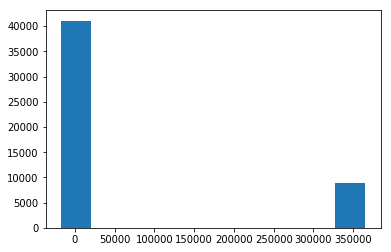

In [61]:
plt.hist(train.DAYS_EMPLOYED);

In [62]:
train.DAYS_EMPLOYED.describe()

count     50000.000000
mean      63218.143580
std      140793.489022
min      -17531.000000
25%       -2786.000000
50%       -1221.000000
75%        -292.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

In [63]:
anom_employed = train[train.DAYS_EMPLOYED == 365243]
nonanom_employed = train[train.DAYS_EMPLOYED != 365243]
print(f"default anomalies {anom_employed['TARGET'].mean()*100} %")
print(f"default not anomalies {nonanom_employed['TARGET'].mean()*100} %")

default anomalies 5.636485880770955 %
default not anomalies 8.576784497029896 %


In [64]:
#надо заменить значения на np.nan и создать доп колонку чтобы показать что значения равны nan

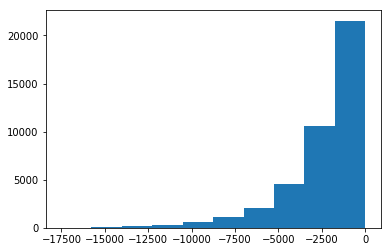

In [65]:
plt.hist(nonanom_employed.DAYS_EMPLOYED);

Correlations with TARGET

In [66]:
corr_target = train.corr()["TARGET"].sort_values()

print(corr_target.head(10))
print(corr_target.tail(10))

EXT_SOURCE_3                 -0.181276
EXT_SOURCE_2                 -0.158426
EXT_SOURCE_1                 -0.156806
CODE_GENDER                  -0.058687
AMT_GOODS_PRICE              -0.041301
REGION_POPULATION_RELATIVE   -0.040797
FLOORSMAX_AVG                -0.040707
DAYS_EMPLOYED                -0.040292
FLOORSMAX_MEDI               -0.039939
FLOORSMAX_MODE               -0.039418
Name: TARGET, dtype: float64
DEF_60_CNT_SOCIAL_CIRCLE       0.044242
FLAG_DOCUMENT_3                0.045046
DAYS_ID_PUBLISH                0.046925
REG_CITY_NOT_WORK_CITY         0.048438
DAYS_LAST_PHONE_CHANGE         0.056131
REGION_RATING_CLIENT           0.066131
REGION_RATING_CLIENT_W_CITY    0.067080
DAYS_BIRTH                     0.076792
TARGET                         1.000000
FLAG_DOCUMENT_12                    NaN
Name: TARGET, dtype: float64


Days_birth has positive correlation, but it has negative value, so getting older probability of default is less as expected

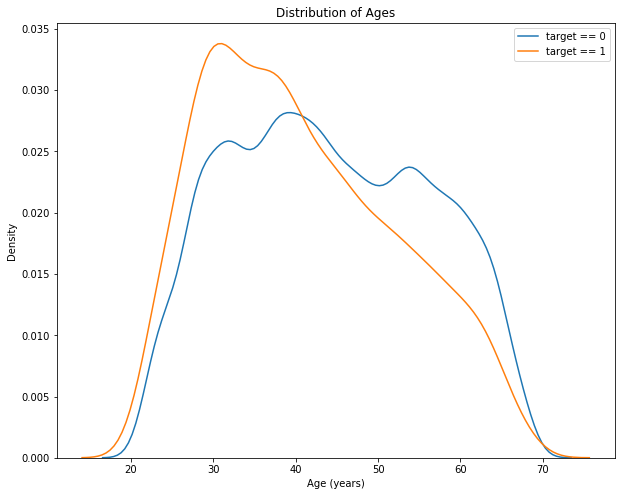

In [68]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

видно что гистограмма при дефолте смещена влево, т.е. когда клиенты молодые им тяжелее выплачивать кредит

In [69]:
age_data = train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

C:\Users\Shota\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Shota\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461.0,25.920548,"(25.0, 30.0]"
1,0,16765.0,45.931507,"(45.0, 50.0]"
2,0,19046.0,52.180822,"(50.0, 55.0]"
3,0,19005.0,52.068493,"(50.0, 55.0]"
4,0,19932.0,54.608219,"(50.0, 55.0]"
5,0,16941.0,46.413699,"(45.0, 50.0]"
6,0,13778.0,37.747945,"(35.0, 40.0]"
7,0,18850.0,51.643836,"(50.0, 55.0]"
8,0,20099.0,55.065753,"(55.0, 60.0]"
9,0,14469.0,39.641096,"(35.0, 40.0]"


In [70]:
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.114770,8522.382735,23.348994
"(25.0, 30.0]",0.111363,10157.701586,27.829319
"(30.0, 35.0]",0.102725,11852.583282,32.472831
"(35.0, 40.0]",0.092743,13711.209724,37.564958
"(40.0, 45.0]",0.075706,15493.519296,42.447998
"(45.0, 50.0]",0.074572,17326.150541,47.468906
"(50.0, 55.0]",0.064578,19194.718712,52.588270
"(55.0, 60.0]",0.056293,20982.520091,57.486356
"(60.0, 65.0]",0.052786,22777.332055,62.403649


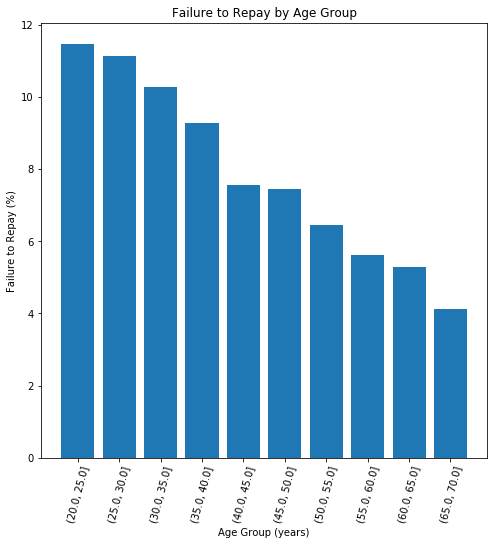

In [71]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

# Bureau

In [72]:
bureau = pd.read_csv(f"{PATH}bureau.csv", nrows = n_rows)

In [73]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [74]:
bureau.dtypes

SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object

In [75]:
bureau.CREDIT_ACTIVE.unique() #embedding category

array(['Closed', 'Active', 'Sold', 'Bad debt'], dtype=object)

In [76]:
bureau.CREDIT_CURRENCY.unique()

array(['currency 1', 'currency 2', 'currency 4', 'currency 3'], dtype=object)

In [77]:
bureau.DAYS_CREDIT.unique() #normalize as continuous

array([ -497,  -208,  -203,  -629,  -273,   -43, -1896, -1146, -2456,  -277,   -96,  -318, -2911, -2148,
        -381,   -95,  -444,  -392,  -784,  -774, ..., -2675, -2811, -2857, -2437, -1941, -2107, -1982, -2005,
       -2605, -2151, -2345, -1657, -2091, -1920, -2470, -2057,    -7, -2024, -2038, -2578], dtype=int64)

In [78]:
bureau.isnull().sum()/bureau.shape[0]

SK_ID_CURR                0.00000
SK_ID_BUREAU              0.00000
CREDIT_ACTIVE             0.00000
CREDIT_CURRENCY           0.00000
DAYS_CREDIT               0.00000
CREDIT_DAY_OVERDUE        0.00000
DAYS_CREDIT_ENDDATE       0.06302
DAYS_ENDDATE_FACT         0.38444
AMT_CREDIT_MAX_OVERDUE    0.64048
CNT_CREDIT_PROLONG        0.00000
AMT_CREDIT_SUM            0.00000
AMT_CREDIT_SUM_DEBT       0.15258
AMT_CREDIT_SUM_LIMIT      0.33968
AMT_CREDIT_SUM_OVERDUE    0.00000
CREDIT_TYPE               0.00000
DAYS_CREDIT_UPDATE        0.00000
AMT_ANNUITY               0.79502
dtype: float64

# Count number of loans for each client 

In [79]:
prev_loans = bureau.groupby("SK_ID_CURR",as_index=False)["SK_ID_BUREAU"].count().rename(columns={"SK_ID_BUREAU": "prev_loans_counts"})

In [80]:
train = train.merge(prev_loans, how = "left", on = "SK_ID_CURR")

In [135]:
test = test.merge(prev_loans, how = "left", on = "SK_ID_CURR")

In [81]:
train["prev_loans_counts"].isnull().sum()

48468

In [82]:
train["prev_loans_counts"] = train["prev_loans_counts"].fillna(0)
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_to_AMT_ANNUITY,AMT_CREDIT_to_AMT_INCOME_TOTAL,AMT_ANNUITY_to_AMT_INCOME_TOTAL,DAYS_EMPLOYED_to_DAYS_BIRTH,prev_loans_counts
0,100002,1,Cash loans,False,False,True,0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,1.0,16.461104,2.007889,0.121978,0.000184,0.0
1,100003,0,Cash loans,True,False,False,0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,36.234085,4.790750,0.132217,0.000194,0.0
2,100004,0,Revolving loans,False,True,True,0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,20.000000,2.000000,0.100000,0.000032,0.0
3,100006,0,Cash loans,True,False,True,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,10.532818,2.316167,0.219900,0.000438,0.0
4,100007,0,Cash loans,False,False,True,0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,23.461618,4.222222,0.179963,0.000418,0.0


In [136]:
test["prev_loans_counts"] = test["prev_loans_counts"].fillna(0)

In [83]:
def kde_with_target(col,target, df):
    corr = df[str(target)].corr(df[str(col)])
    avg_repaid = df.ix[df[target] == 0, col].median()
    avg_not_repaid = df.ix[df[target] == 1, col].median()
    
    sns.kdeplot(df.ix[df[target] == 0, col], label = 'TARGET == 0')
    sns.kdeplot(df.ix[df['TARGET'] == 1, col], label = 'TARGET == 1')
    
    plt.xlabel(col); plt.ylabel('Density'); plt.title('%s Distribution' % col)
    plt.legend();
    
    print(f"average repaid loans : {avg_repaid}")
    print(f"average not repaid loans : {avg_not_repaid}")

C:\Users\Shota\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Shota\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\Shota\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable

average repaid loans : 0.5460231970049609
average not repaid loans : 0.3791004853998145


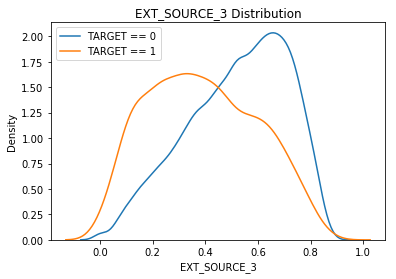

In [84]:
kde_with_target('EXT_SOURCE_3', "TARGET", train)

Больше EXT_SOURCE_3 больше выплаченных кредитов

In [85]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [86]:
bureau_agg = bureau.drop(columns=["SK_ID_BUREAU"]).groupby("SK_ID_CURR").agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                                 CREDIT_DAY_OVERDUE  \
                   count         mean   max   min    sum              count   
0     100016           6  -677.833333  -128 -1634  -4067                  6   
1     100053           7 -2287.714286 -1764 -2893 -16014                  7   
2     100165           2 -1775.000000 -1225 -2325  -3550                  2   
3     100166          13  -906.538462  -106 -2058 -11785                 13   
4     100294           5  -774.400000  -217 -1137  -3872                  5   

               ...  DAYS_CREDIT_UPDATE                                 \
  mean max min ...               count         mean   max   min   sum   
0  0.0   0   0 ...                   6  -465.833333    -3 -1367 -2795   
1  0.0   0   0 ...                   7 -1137.571429  -630 -1945 -7963   
2  0.0   0   0 ...                   2 -1558.500000 -1011 -2106 -3117   
3  0.0   0   0 ...                  13  -663.000000   -29 -1470 -8619   
4  0.0   0   0 ...                   5  -366.800000   -24  -789 -1834   

  AMT_ANNUITY                    
        count mean max min  sum  
0           0  NaN NaN NaN  0.0  
1           0  NaN NaN NaN  0.0  
2           0  NaN NaN NaN  0.0  
3           0  NaN NaN NaN  0.0  
4           0  NaN NaN NaN  0.0  

[5 rows x 61 columns]

In [87]:
columns = ["SK_ID_CURR"]

for var in bureau_agg.columns.levels[0]:
    if var!= columns[0]:
        for c in bureau_agg.columns.levels[1][:-1]:
            columns.append(f"bureau_{var}_{c}")

In [88]:
bureau_agg.columns.levels[1]

Index(['count', 'mean', 'max', 'min', 'sum', ''], dtype='object')

In [89]:
columns

['SK_ID_CURR',
 'bureau_DAYS_CREDIT_count',
 'bureau_DAYS_CREDIT_mean',
 'bureau_DAYS_CREDIT_max',
 'bureau_DAYS_CREDIT_min',
 'bureau_DAYS_CREDIT_sum',
 'bureau_CREDIT_DAY_OVERDUE_count',
 'bureau_CREDIT_DAY_OVERDUE_mean',
 'bureau_CREDIT_DAY_OVERDUE_max',
 'bureau_CREDIT_DAY_OVERDUE_min',
 'bureau_CREDIT_DAY_OVERDUE_sum',
 'bureau_DAYS_CREDIT_ENDDATE_count',
 'bureau_DAYS_CREDIT_ENDDATE_mean',
 'bureau_DAYS_CREDIT_ENDDATE_max',
 'bureau_DAYS_CREDIT_ENDDATE_min',
 'bureau_DAYS_CREDIT_ENDDATE_sum',
 'bureau_DAYS_ENDDATE_FACT_count',
 'bureau_DAYS_ENDDATE_FACT_mean',
 'bureau_DAYS_ENDDATE_FACT_max',
 'bureau_DAYS_ENDDATE_FACT_min',
 'bureau_DAYS_ENDDATE_FACT_sum',
 'bureau_AMT_CREDIT_MAX_OVERDUE_count',
 'bureau_AMT_CREDIT_MAX_OVERDUE_mean',
 'bureau_AMT_CREDIT_MAX_OVERDUE_max',
 'bureau_AMT_CREDIT_MAX_OVERDUE_min',
 'bureau_AMT_CREDIT_MAX_OVERDUE_sum',
 'bureau_CNT_CREDIT_PROLONG_count',
 'bureau_CNT_CREDIT_PROLONG_mean',
 'bureau_CNT_CREDIT_PROLONG_max',
 'bureau_CNT_CREDIT_PROLONG_mi

In [90]:
bureau_agg.columns = columns
bureau_agg.head()

,SK_ID_CURR,bureau_DAYS_CREDIT_count,bureau_DAYS_CREDIT_mean,bureau_DAYS_CREDIT_max,bureau_DAYS_CREDIT_min,bureau_DAYS_CREDIT_sum,bureau_CREDIT_DAY_OVERDUE_count,bureau_CREDIT_DAY_OVERDUE_mean,bureau_CREDIT_DAY_OVERDUE_max,bureau_CREDIT_DAY_OVERDUE_min,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100016,6,-677.833333,-128,-1634,-4067,6,0.0,0,0,...,6,-465.833333,-3,-1367,-2795,0,NaN,NaN,NaN,0.0
1,100053,7,-2287.714286,-1764,-2893,-16014,7,0.0,0,0,...,7,-1137.571429,-630,-1945,-7963,0,NaN,NaN,NaN,0.0
2,100165,2,-1775.000000,-1225,-2325,-3550,2,0.0,0,0,...,2,-1558.500000,-1011,-2106,-3117,0,NaN,NaN,NaN,0.0
3,100166,13,-906.538462,-106,-2058,-11785,13,0.0,0,0,...,13,-663.000000,-29,-1470,-8619,0,NaN,NaN,NaN,0.0
4,100294,5,-774.400000,-217,-1137,-3872,5,0.0,0,0,...,5,-366.800000,-24,-789,-1834,0,NaN,NaN,NaN,0.0


In [91]:
train = train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100002,1,Cash loans,False,False,True,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,Cash loans,True,False,False,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,False,True,True,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,True,False,True,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,False,False,True,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
test = test.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
test.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,bureau_DAYS_CREDIT_UPDATE_count,bureau_DAYS_CREDIT_UPDATE_mean,bureau_DAYS_CREDIT_UPDATE_max,bureau_DAYS_CREDIT_UPDATE_min,bureau_DAYS_CREDIT_UPDATE_sum,bureau_AMT_ANNUITY_count,bureau_AMT_ANNUITY_mean,bureau_AMT_ANNUITY_max,bureau_AMT_ANNUITY_min,bureau_AMT_ANNUITY_sum
0,100002,1,Cash loans,False,False,True,0,202500.0,406597.5,24700.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,Cash loans,True,False,False,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,False,True,True,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,True,False,True,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,False,False,True,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [92]:
train.shape

(50000, 187)

In [139]:
test.shape #no TARGET

(48744, 186)

calculate correlations with TARGET 

In [93]:
new_corr = []
for c in columns:
    corr = train["TARGET"].corr(train[c])
    new_corr.append((c, corr))

In [94]:
new_corrs = sorted(new_corr, key=lambda x: abs(x[1]), reverse = True)

In [95]:
new_corrs[:15]

[('bureau_CNT_CREDIT_PROLONG_min', 0.09326698719774514),
 ('bureau_AMT_ANNUITY_min', 0.08733534292205171),
 ('bureau_AMT_ANNUITY_mean', 0.08377731017369049),
 ('bureau_DAYS_CREDIT_mean', 0.08321178378762496),
 ('bureau_DAYS_CREDIT_min', 0.07563283034651304),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.07385949690209473),
 ('bureau_DAYS_CREDIT_max', 0.06353045410763496),
 ('bureau_DAYS_CREDIT_sum', 0.06268431247143508),
 ('bureau_DAYS_ENDDATE_FACT_sum', 0.05664395285413042),
 ('bureau_DAYS_CREDIT_UPDATE_sum', 0.05512679887341244),
 ('bureau_DAYS_CREDIT_UPDATE_max', 0.0526543037507271),
 ('bureau_AMT_ANNUITY_count', 0.049302329229983906),
 ('bureau_DAYS_ENDDATE_FACT_count', -0.048312192937788136),
 ('bureau_DAYS_ENDDATE_FACT_min', 0.047674206018141485),
 ('bureau_DAYS_CREDIT_UPDATE_min', 0.04375707567508266)]

C:\Users\Shota\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Shota\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
C:\Users\Shota\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable

average repaid loans : -1070.0
average not repaid loans : -854.5


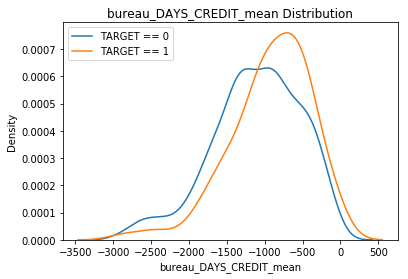

In [96]:
kde_with_target("bureau_DAYS_CREDIT_mean", "TARGET", train)

Если клиент брал кредит недавно то вероятность выплаты нового кредита меньше чем если он брал его давно

In [97]:
train.shape

(50000, 187)

# Bureau balance

In [98]:
bureau_bal = pd.read_csv(f"{PATH}bureau_balance.csv",nrows = n_rows)

In [99]:
def agg_numeric(df, parent_var, df_name):
    """
    Groups and aggregates the numeric values in a child dataframe
    by the parent variable.
    
    Parameters
    --------
        df (dataframe): 
            the child dataframe to calculate the statistics on
        parent_var (string): 
            the parent variable used for grouping and aggregating
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated by the `parent_var` for 
            all numeric columns. Each observation of the parent variable will have 
            one row in the dataframe with the parent variable as the index. 
            The columns are also renamed using the `df_name`. Columns with all duplicate
            values are removed. 
    
    """
    
    # Remove id variables other than grouping variable
    for col in df:
        if col != parent_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    # Only want the numeric variables
    parent_ids = df[parent_var].copy()
    numeric_df = df.select_dtypes('number').copy()
    numeric_df[parent_var] = parent_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(parent_var).agg(['count', 'mean', 'max', 'min', 'sum'])

    # Need to create new column names
    columns = []

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        if var != parent_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))
    
    agg.columns = columns
    
    # Remove the columns with all redundant values
    _, idx = np.unique(agg, axis = 1, return_index=True)
    agg = agg.iloc[:, idx]
    
    return agg

In [100]:
bureau_bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [101]:
bur_bal_agg = bureau_bal.groupby("SK_ID_BUREAU").agg(["count","mean","max","min","sum"]).reset_index()

In [102]:
bur_bal_agg.head()

SK_ID_BUREAU MONTHS_BALANCE                    
                        count  mean max min   sum
0      5212206             60 -29.5   0 -59 -1770
1      5212207             59 -29.0   0 -58 -1711
2      5212208             97 -48.0   0 -96 -4656
3      5212210             85 -42.0   0 -84 -3570
4      5212211             97 -48.0   0 -96 -4656

In [103]:
def count_categorical(df, group_var, df_name):
    """Computes counts and normalized counts for each observation
    of `group_var` of each unique category in every categorical variable
    
    Parameters
    --------
    df : dataframe 
        The dataframe to calculate the value counts for.
        
    group_var : string
        The variable by which to group the dataframe. For each unique
        value of this variable, the final dataframe will have one row
        
    df_name : string
        Variable added to the front of column names to keep track of columns

    
    Return
    --------
    categorical : dataframe
        A dataframe with counts and normalized counts of each unique category in every categorical variable
        with one row for every unique value of the `group_var`.
        
    """
    
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

In [104]:
bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_counts.head()

,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_count_norm,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_count_norm,...,bureau_CREDIT_TYPE_Loan for working capital replenishment_count,bureau_CREDIT_TYPE_Loan for working capital replenishment_count_norm,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100016,3,0.500000,0,0.0,3,0.500000,0,0.0,6,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100053,1,0.142857,0,0.0,6,0.857143,0,0.0,7,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100165,0,0.000000,0,0.0,2,1.000000,0,0.0,2,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100166,2,0.153846,0,0.0,11,0.846154,0,0.0,13,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100294,1,0.200000,0,0.0,4,0.800000,0,0.0,5,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [105]:
# Counts of each type of status for each previous loan
bureau_balance_counts = count_categorical(bureau_bal, group_var = 'SK_ID_BUREAU', df_name = 'bureau_bal')
bureau_balance_counts.head()

,bureau_bal_STATUS_0_count,bureau_bal_STATUS_0_count_norm,bureau_bal_STATUS_1_count,bureau_bal_STATUS_1_count_norm,bureau_bal_STATUS_2_count,bureau_bal_STATUS_2_count_norm,bureau_bal_STATUS_3_count,bureau_bal_STATUS_3_count_norm,bureau_bal_STATUS_4_count,bureau_bal_STATUS_4_count_norm,bureau_bal_STATUS_5_count,bureau_bal_STATUS_5_count_norm,bureau_bal_STATUS_C_count,bureau_bal_STATUS_C_count_norm,bureau_bal_STATUS_X_count,bureau_bal_STATUS_X_count_norm
SK_ID_BUREAU,,,,,,,,,,,,,,,,
5212206,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,60,1.000000
5212207,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.000000,59,1.000000
5212208,0,0.000000,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,95,0.979381,2,0.020619
5212210,21,0.247059,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,38,0.447059,26,0.305882
5212211,16,0.164948,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,23,0.237113,58,0.597938


In [106]:
bureau_bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [107]:
def agg_numeric(df, group_var, df_name):
    """Aggregates the numeric values in a dataframe. This can
    be used to create features for each instance of the grouping variable.
    
    Parameters
    --------
        df (dataframe): 
            the dataframe to calculate the statistics on
        group_var (string): 
            the variable by which to group df
        df_name (string): 
            the variable used to rename the columns
        
    Return
    --------
        agg (dataframe): 
            a dataframe with the statistics aggregated for 
            all numeric columns. Each instance of the grouping variable will have 
            the statistics (mean, min, max, sum; currently supported) calculated. 
            The columns are also renamed to keep track of features created.
    
    """
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [108]:
# Calculate value count statistics for each `SK_ID_CURR` 
bureau_balance_agg = agg_numeric(bureau_bal, group_var= 'SK_ID_BUREAU', df_name = 'bureau_balance')
bureau_balance_agg.head()

C:\Users\Shota\Anaconda3\envs\fastai\lib\site-packages\ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum
0,5212206,60,-29.5,0,-59,-1770
1,5212207,59,-29.0,0,-58,-1711
2,5212208,97,-48.0,0,-96,-4656
3,5212210,85,-42.0,0,-84,-3570
4,5212211,97,-48.0,0,-96,-4656


In [109]:
# Dataframe grouped by the loan
bureau_by_loan = bureau_balance_agg.merge(bureau_balance_counts, right_index = True, left_on = 'SK_ID_BUREAU', how = 'outer')

# Merge to include the SK_ID_CURR
bureau_by_loan = bureau_by_loan.merge(bureau[['SK_ID_BUREAU', 'SK_ID_CURR']], on = 'SK_ID_BUREAU', how = 'left')

bureau_by_loan.head()

,SK_ID_BUREAU,bureau_balance_MONTHS_BALANCE_count,bureau_balance_MONTHS_BALANCE_mean,bureau_balance_MONTHS_BALANCE_max,bureau_balance_MONTHS_BALANCE_min,bureau_balance_MONTHS_BALANCE_sum,bureau_bal_STATUS_0_count,bureau_bal_STATUS_0_count_norm,bureau_bal_STATUS_1_count,bureau_bal_STATUS_1_count_norm,...,bureau_bal_STATUS_3_count_norm,bureau_bal_STATUS_4_count,bureau_bal_STATUS_4_count_norm,bureau_bal_STATUS_5_count,bureau_bal_STATUS_5_count_norm,bureau_bal_STATUS_C_count,bureau_bal_STATUS_C_count_norm,bureau_bal_STATUS_X_count,bureau_bal_STATUS_X_count_norm,SK_ID_CURR
0,5212206,60,-29.5,0,-59,-1770,0,0.000000,0,0.0,...,0.0,0,0.0,0,0.0,0,0.000000,60,1.000000,237267.0
1,5212207,59,-29.0,0,-58,-1711,0,0.000000,0,0.0,...,0.0,0,0.0,0,0.0,0,0.000000,59,1.000000,237267.0
2,5212208,97,-48.0,0,-96,-4656,0,0.000000,0,0.0,...,0.0,0,0.0,0,0.0,95,0.979381,2,0.020619,NaN
3,5212210,85,-42.0,0,-84,-3570,21,0.247059,0,0.0,...,0.0,0,0.0,0,0.0,38,0.447059,26,0.305882,237267.0
4,5212211,97,-48.0,0,-96,-4656,16,0.164948,0,0.0,...,0.0,0,0.0,0,0.0,23,0.237113,58,0.597938,NaN


In [110]:
bureau_balance_by_client = agg_numeric(bureau_by_loan.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'client')
bureau_balance_by_client.head()

,SK_ID_CURR,client_bureau_balance_MONTHS_BALANCE_count_count,client_bureau_balance_MONTHS_BALANCE_count_mean,client_bureau_balance_MONTHS_BALANCE_count_max,client_bureau_balance_MONTHS_BALANCE_count_min,client_bureau_balance_MONTHS_BALANCE_count_sum,client_bureau_balance_MONTHS_BALANCE_mean_count,client_bureau_balance_MONTHS_BALANCE_mean_mean,client_bureau_balance_MONTHS_BALANCE_mean_max,client_bureau_balance_MONTHS_BALANCE_mean_min,...,client_bureau_bal_STATUS_X_count_count,client_bureau_bal_STATUS_X_count_mean,client_bureau_bal_STATUS_X_count_max,client_bureau_bal_STATUS_X_count_min,client_bureau_bal_STATUS_X_count_sum,client_bureau_bal_STATUS_X_count_norm_count,client_bureau_bal_STATUS_X_count_norm_mean,client_bureau_bal_STATUS_X_count_norm_max,client_bureau_bal_STATUS_X_count_norm_min,client_bureau_bal_STATUS_X_count_norm_sum
0,102340.0,3,16.666667,32,9,50,3,-7.833333,-4.0,-15.5,...,3,6.666667,10,2,20.0,3,0.474537,0.888889,0.222222,1.423611
1,103173.0,6,26.333333,48,7,158,6,-12.833333,-3.0,-23.5,...,6,23.666667,48,0,142.0,6,0.758333,1.000000,0.000000,4.550000
2,104506.0,4,33.250000,43,11,133,4,-16.625000,-5.0,-22.0,...,4,20.000000,43,0,80.0,4,0.500000,1.000000,0.000000,2.000000
3,106610.0,4,31.750000,58,9,127,4,-16.125000,-5.0,-29.5,...,4,2.250000,9,0,9.0,4,0.250000,1.000000,0.000000,1.000000
4,110937.0,3,22.333333,37,12,67,3,-10.666667,-5.5,-18.0,...,3,6.000000,18,0,18.0,3,0.333333,1.000000,0.000000,1.000000


In [111]:
original_features = list(train.columns)
print('Original Number of Features: ', len(original_features))

Original Number of Features:  187


In [155]:
# Merge with the value counts of bureau
train = train.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')

# Merge with the stats of bureau
train = train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

# Merge with the monthly information grouped by client
train = train.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')

In [140]:
# Merge with the value counts of bureau
test = test.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')

# Merge with the stats of bureau
test = test.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')

# Merge with the monthly information grouped by client
test = test.merge(bureau_balance_by_client, on = 'SK_ID_CURR', how = 'left')

In [103]:
new_features = list(train.columns)
print('Number of features using previous loans from other institutions data: ', len(new_features))

Number of features using previous loans from other institutions data:  394


In [156]:
train.shape, test.shape

((50000, 388), (48744, 387))

# BUREAU

In [115]:
bureau = pd.read_csv(f"{PATH}bureau.csv", nrows=n_rows)

AttributeError: 'DataFrame' object has no attribute 'AMT_CREDIT_SUM_OVERDUE'

In [117]:
bureau_counts.head()

,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_count_norm,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_count_norm,...,bureau_CREDIT_TYPE_Loan for working capital replenishment_count,bureau_CREDIT_TYPE_Loan for working capital replenishment_count_norm,bureau_CREDIT_TYPE_Microloan_count,bureau_CREDIT_TYPE_Microloan_count_norm,bureau_CREDIT_TYPE_Mortgage_count,bureau_CREDIT_TYPE_Mortgage_count_norm,bureau_CREDIT_TYPE_Real estate loan_count,bureau_CREDIT_TYPE_Real estate loan_count_norm,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown type of loan_count_norm
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,
100016,3,0.500000,0,0.0,3,0.500000,0,0.0,6,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100053,1,0.142857,0,0.0,6,0.857143,0,0.0,7,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100165,0,0.000000,0,0.0,2,1.000000,0,0.0,2,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100166,2,0.153846,0,0.0,11,0.846154,0,0.0,13,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
100294,1,0.200000,0,0.0,4,0.800000,0,0.0,5,1.0,...,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [168]:
pd.set_option('display.max_columns', 335)

In [170]:
contin = train.select_dtypes("float64").columns

In [252]:
cat = train.select_dtypes("bool").columns

In [261]:
train.dtypes

SK_ID_CURR                                       int64
TARGET                                           int64
NAME_CONTRACT_TYPE                              object
CODE_GENDER                                       bool
FLAG_OWN_CAR                                      bool
FLAG_OWN_REALTY                                   bool
CNT_CHILDREN                                     int64
AMT_INCOME_TOTAL                               float64
AMT_CREDIT                                     float64
AMT_ANNUITY                                    float64
AMT_GOODS_PRICE                                float64
NAME_TYPE_SUITE                                 object
NAME_INCOME_TYPE                                object
NAME_EDUCATION_TYPE                             object
NAME_FAMILY_STATUS                              object
NAME_HOUSING_TYPE                               object
REGION_POPULATION_RELATIVE                     float64
DAYS_BIRTH                                     float64
DAYS_EMPLO

# Make model 

In [105]:
#need to fill

In [262]:
list(cat)+["hello"]

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'hello']

In [280]:
cat_vars = list(cat)+["SK_ID_CURR"]

contin_vars = list(contin)

In [281]:
dep = 'TARGET'
joined = train[cat_vars+contin_vars+[dep]].copy()

In [282]:
joined.shape

(50000, 365)

In [283]:
n = len(joined); n


50000

In [284]:
test[dep] = 0
joined_test = test[cat_vars+contin_vars+[dep]].copy()



In [285]:
joined_test.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_to_AMT_ANNUITY,AMT_CREDIT_to_AMT_INCOME_TOTAL,AMT_ANNUITY_to_AMT_INCOME_TOTAL,DAYS_EMPLOYED_to_DAYS_BIRTH,prev_loans_counts,bureau_DAYS_CREDIT_count_x,bureau_DAYS_CREDIT_mean_x,bureau_DAYS_CREDIT_max_x,bureau_DAYS_CREDIT_min_x,bureau_DAYS_CREDIT_sum_x,bureau_CREDIT_DAY_OVERDUE_count_x,bureau_CREDIT_DAY_OVERDUE_mean_x,bureau_CREDIT_DAY_OVERDUE_max_x,bureau_CREDIT_DAY_OVERDUE_min_x,bureau_CREDIT_DAY_OVERDUE_sum_x,bureau_DAYS_CREDIT_ENDDATE_count_x,bureau_DAYS_CREDIT_ENDDATE_mean_x,bureau_DAYS_CREDIT_ENDDATE_max_x,bureau_DAYS_CREDIT_ENDDATE_min_x,bureau_DAYS_CREDIT_ENDDATE_sum_x,bureau_DAYS_ENDDATE_FACT_count_x,bureau_DAYS_ENDDATE_FACT_mean_x,bureau_DAYS_ENDDATE_FACT_max_x,bureau_DAYS_ENDDATE_FACT_min_x,bureau_DAYS_ENDDATE_FACT_sum_x,bureau_AMT_CREDIT_MAX_OVERDUE_count_x,bureau_AMT_CREDIT_MAX_OVERDUE_mean_x,bureau_AMT_CREDIT_MAX_OVERDUE_max_x,bureau_AMT_CREDIT_MAX_OVERDUE_min_x,bureau_AMT_CREDIT_MAX_OVERDUE_sum_x,bureau_CNT_CREDIT_PROLONG_count_x,bureau_CNT_CREDIT_PROLONG_mean_x,bureau_CNT_CREDIT_PROLONG_max_x,bureau_CNT_CREDIT_PROLONG_min_x,bureau_CNT_CREDIT_PROLONG_sum_x,bureau_AMT_CREDIT_SUM_count_x,bureau_AMT_CREDIT_SUM_mean_x,bureau_AMT_CREDIT_SUM_max_x,bureau_AMT_CREDIT_SUM_min_x,bureau_AMT_CREDIT_SUM_sum_x,bureau_AMT_CREDIT_SUM_DEBT_count_x,bureau_AMT_CREDIT_SUM_DEBT_mean_x,bureau_AMT_CREDIT_SUM_DEBT_max_x,bureau_AMT_CREDIT_SUM_DEBT_min_x,bureau_AMT_CREDIT_SUM_DEBT_sum_x,bureau_AMT_CREDIT_SUM_LIMIT_count_x,bureau_AMT_CREDIT_SUM_LIMIT_mean_x,bureau_AMT_CREDIT_SUM_LIMIT_max_x,bureau_AMT_CREDIT_SUM_LIMIT_min_x,bureau_AMT_CREDIT_SUM_LIMIT_sum_x,bureau_AMT_CREDIT_SUM_OVERDUE_count_x,bureau_AMT_CREDIT_SUM_OVERDUE_mean_x,bureau_AMT_CREDIT_SUM_OVERDUE_max_x,bureau_AMT_CREDIT_SUM_OVERDUE_min_x,bureau_AMT_CREDIT_SUM_OVERDUE_sum_x,bureau_DAYS_CREDIT_UPDATE_count_x,bureau_DAYS_CREDIT_UPDATE_mean_x,bureau_DAYS_CREDIT_UPDATE_max_x,bureau_DAYS_CREDIT_UPDATE_min_x,bureau_DAYS_CREDIT_UPDATE_sum_x,bureau_AMT_ANNUITY_count_x,bureau_AMT_ANNUITY_mean_x,bureau_AMT_ANNUITY_max_x,bureau_AMT_ANNUITY_min_x,bureau_AMT_ANNUITY_sum_x,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,...,bureau_CREDIT_TYPE_Unknown type of loan_count_norm,bureau_DAYS_CREDIT_count_

In [286]:
for v in cat_vars: joined[v] = joined[v].astype('category').cat.as_ordered()


In [288]:
apply_cats(joined_test.drop(["SK_ID_CURR"],axis=1), joined)

In [290]:
joined_test.SK_ID_CURR = joined_test.SK_ID_CURR.astype("category")

In [292]:
joined_test.SK_ID_CURR.head()

0    100001
1    100005
2    100013
3    100028
4    100038
Name: SK_ID_CURR, dtype: category
Categories (48744, int64): [100001, 100005, 100013, 100028, ..., 456222, 456223, 456224, 456250]

In [293]:
joined_test.SK_ID_CURR.isnull().sum()

0

In [294]:
for v in contin_vars:
    joined[v] = joined[v].fillna(0).astype('float32')
    joined_test[v] = joined_test[v].fillna(0).astype('float32')

idxs = get_cv_idxs(n, val_pct=0.2)

joined_samp = joined.iloc[idxs]#.set_index("SK_ID_CURR")
samp_size = len(joined_samp);

In [295]:
joined_samp.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_to_AMT_ANNUITY,AMT_CREDIT_to_AMT_INCOME_TOTAL,AMT_ANNUITY_to_AMT_INCOME_TOTAL,DAYS_EMPLOYED_to_DAYS_BIRTH,prev_loans_counts,bureau_DAYS_CREDIT_count_x,bureau_DAYS_CREDIT_mean_x,bureau_DAYS_CREDIT_max_x,bureau_DAYS_CREDIT_min_x,bureau_DAYS_CREDIT_sum_x,bureau_CREDIT_DAY_OVERDUE_count_x,bureau_CREDIT_DAY_OVERDUE_mean_x,bureau_CREDIT_DAY_OVERDUE_max_x,bureau_CREDIT_DAY_OVERDUE_min_x,bureau_CREDIT_DAY_OVERDUE_sum_x,bureau_DAYS_CREDIT_ENDDATE_count_x,bureau_DAYS_CREDIT_ENDDATE_mean_x,bureau_DAYS_CREDIT_ENDDATE_max_x,bureau_DAYS_CREDIT_ENDDATE_min_x,bureau_DAYS_CREDIT_ENDDATE_sum_x,bureau_DAYS_ENDDATE_FACT_count_x,bureau_DAYS_ENDDATE_FACT_mean_x,bureau_DAYS_ENDDATE_FACT_max_x,bureau_DAYS_ENDDATE_FACT_min_x,bureau_DAYS_ENDDATE_FACT_sum_x,bureau_AMT_CREDIT_MAX_OVERDUE_count_x,bureau_AMT_CREDIT_MAX_OVERDUE_mean_x,bureau_AMT_CREDIT_MAX_OVERDUE_max_x,bureau_AMT_CREDIT_MAX_OVERDUE_min_x,bureau_AMT_CREDIT_MAX_OVERDUE_sum_x,bureau_CNT_CREDIT_PROLONG_count_x,bureau_CNT_CREDIT_PROLONG_mean_x,bureau_CNT_CREDIT_PROLONG_max_x,bureau_CNT_CREDIT_PROLONG_min_x,bureau_CNT_CREDIT_PROLONG_sum_x,bureau_AMT_CREDIT_SUM_count_x,bureau_AMT_CREDIT_SUM_mean_x,bureau_AMT_CREDIT_SUM_max_x,bureau_AMT_CREDIT_SUM_min_x,bureau_AMT_CREDIT_SUM_sum_x,bureau_AMT_CREDIT_SUM_DEBT_count_x,bureau_AMT_CREDIT_SUM_DEBT_mean_x,bureau_AMT_CREDIT_SUM_DEBT_max_x,bureau_AMT_CREDIT_SUM_DEBT_min_x,bureau_AMT_CREDIT_SUM_DEBT_sum_x,bureau_AMT_CREDIT_SUM_LIMIT_count_x,bureau_AMT_CREDIT_SUM_LIMIT_mean_x,bureau_AMT_CREDIT_SUM_LIMIT_max_x,bureau_AMT_CREDIT_SUM_LIMIT_min_x,bureau_AMT_CREDIT_SUM_LIMIT_sum_x,bureau_AMT_CREDIT_SUM_OVERDUE_count_x,bureau_AMT_CREDIT_SUM_OVERDUE_mean_x,bureau_AMT_CREDIT_SUM_OVERDUE_max_x,bureau_AMT_CREDIT_SUM_OVERDUE_min_x,bureau_AMT_CREDIT_SUM_OVERDUE_sum_x,bureau_DAYS_CREDIT_UPDATE_count_x,bureau_DAYS_CREDIT_UPDATE_mean_x,bureau_DAYS_CREDIT_UPDATE_max_x,bureau_DAYS_CREDIT_UPDATE_min_x,bureau_DAYS_CREDIT_UPDATE_sum_x,bureau_AMT_ANNUITY_count_x,bureau_AMT_ANNUITY_mean_x,bureau_AMT_ANNUITY_max_x,bureau_AMT_ANNUITY_min_x,bureau_AMT_ANNUITY_sum_x,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,...,bureau_CREDIT_TYPE_Unknown type of loan_count_norm,bureau_DAYS_CREDIT_count_

In [296]:
joined_test.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_to_AMT_ANNUITY,AMT_CREDIT_to_AMT_INCOME_TOTAL,AMT_ANNUITY_to_AMT_INCOME_TOTAL,DAYS_EMPLOYED_to_DAYS_BIRTH,prev_loans_counts,bureau_DAYS_CREDIT_count_x,bureau_DAYS_CREDIT_mean_x,bureau_DAYS_CREDIT_max_x,bureau_DAYS_CREDIT_min_x,bureau_DAYS_CREDIT_sum_x,bureau_CREDIT_DAY_OVERDUE_count_x,bureau_CREDIT_DAY_OVERDUE_mean_x,bureau_CREDIT_DAY_OVERDUE_max_x,bureau_CREDIT_DAY_OVERDUE_min_x,bureau_CREDIT_DAY_OVERDUE_sum_x,bureau_DAYS_CREDIT_ENDDATE_count_x,bureau_DAYS_CREDIT_ENDDATE_mean_x,bureau_DAYS_CREDIT_ENDDATE_max_x,bureau_DAYS_CREDIT_ENDDATE_min_x,bureau_DAYS_CREDIT_ENDDATE_sum_x,bureau_DAYS_ENDDATE_FACT_count_x,bureau_DAYS_ENDDATE_FACT_mean_x,bureau_DAYS_ENDDATE_FACT_max_x,bureau_DAYS_ENDDATE_FACT_min_x,bureau_DAYS_ENDDATE_FACT_sum_x,bureau_AMT_CREDIT_MAX_OVERDUE_count_x,bureau_AMT_CREDIT_MAX_OVERDUE_mean_x,bureau_AMT_CREDIT_MAX_OVERDUE_max_x,bureau_AMT_CREDIT_MAX_OVERDUE_min_x,bureau_AMT_CREDIT_MAX_OVERDUE_sum_x,bureau_CNT_CREDIT_PROLONG_count_x,bureau_CNT_CREDIT_PROLONG_mean_x,bureau_CNT_CREDIT_PROLONG_max_x,bureau_CNT_CREDIT_PROLONG_min_x,bureau_CNT_CREDIT_PROLONG_sum_x,bureau_AMT_CREDIT_SUM_count_x,bureau_AMT_CREDIT_SUM_mean_x,bureau_AMT_CREDIT_SUM_max_x,bureau_AMT_CREDIT_SUM_min_x,bureau_AMT_CREDIT_SUM_sum_x,bureau_AMT_CREDIT_SUM_DEBT_count_x,bureau_AMT_CREDIT_SUM_DEBT_mean_x,bureau_AMT_CREDIT_SUM_DEBT_max_x,bureau_AMT_CREDIT_SUM_DEBT_min_x,bureau_AMT_CREDIT_SUM_DEBT_sum_x,bureau_AMT_CREDIT_SUM_LIMIT_count_x,bureau_AMT_CREDIT_SUM_LIMIT_mean_x,bureau_AMT_CREDIT_SUM_LIMIT_max_x,bureau_AMT_CREDIT_SUM_LIMIT_min_x,bureau_AMT_CREDIT_SUM_LIMIT_sum_x,bureau_AMT_CREDIT_SUM_OVERDUE_count_x,bureau_AMT_CREDIT_SUM_OVERDUE_mean_x,bureau_AMT_CREDIT_SUM_OVERDUE_max_x,bureau_AMT_CREDIT_SUM_OVERDUE_min_x,bureau_AMT_CREDIT_SUM_OVERDUE_sum_x,bureau_DAYS_CREDIT_UPDATE_count_x,bureau_DAYS_CREDIT_UPDATE_mean_x,bureau_DAYS_CREDIT_UPDATE_max_x,bureau_DAYS_CREDIT_UPDATE_min_x,bureau_DAYS_CREDIT_UPDATE_sum_x,bureau_AMT_ANNUITY_count_x,bureau_AMT_ANNUITY_mean_x,bureau_AMT_ANNUITY_max_x,bureau_AMT_ANNUITY_min_x,bureau_AMT_ANNUITY_sum_x,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,...,bureau_CREDIT_TYPE_Unknown type of loan_count_norm,bureau_DAYS_CREDIT_count_

To run on full dataset

In [ ]:
samp_size = n
joined_samp = joined.set_index("ID_CURR")

In [479]:
df, y, nas, mapper = proc_df(joined_samp, 'TARGET', do_scale=True)

In [231]:
#joined_test = joined_test.set_index("SK_ID_CURR")

In [298]:
df.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_to_AMT_ANNUITY,AMT_CREDIT_to_AMT_INCOME_TOTAL,AMT_ANNUITY_to_AMT_INCOME_TOTAL,DAYS_EMPLOYED_to_DAYS_BIRTH,prev_loans_counts,bureau_DAYS_CREDIT_count_x,bureau_DAYS_CREDIT_mean_x,bureau_DAYS_CREDIT_max_x,bureau_DAYS_CREDIT_min_x,bureau_DAYS_CREDIT_sum_x,bureau_CREDIT_DAY_OVERDUE_count_x,bureau_CREDIT_DAY_OVERDUE_mean_x,bureau_CREDIT_DAY_OVERDUE_max_x,bureau_CREDIT_DAY_OVERDUE_min_x,bureau_CREDIT_DAY_OVERDUE_sum_x,bureau_DAYS_CREDIT_ENDDATE_count_x,bureau_DAYS_CREDIT_ENDDATE_mean_x,bureau_DAYS_CREDIT_ENDDATE_max_x,bureau_DAYS_CREDIT_ENDDATE_min_x,bureau_DAYS_CREDIT_ENDDATE_sum_x,bureau_DAYS_ENDDATE_FACT_count_x,bureau_DAYS_ENDDATE_FACT_mean_x,bureau_DAYS_ENDDATE_FACT_max_x,bureau_DAYS_ENDDATE_FACT_min_x,bureau_DAYS_ENDDATE_FACT_sum_x,bureau_AMT_CREDIT_MAX_OVERDUE_count_x,bureau_AMT_CREDIT_MAX_OVERDUE_mean_x,bureau_AMT_CREDIT_MAX_OVERDUE_max_x,bureau_AMT_CREDIT_MAX_OVERDUE_min_x,bureau_AMT_CREDIT_MAX_OVERDUE_sum_x,bureau_CNT_CREDIT_PROLONG_count_x,bureau_CNT_CREDIT_PROLONG_mean_x,bureau_CNT_CREDIT_PROLONG_max_x,bureau_CNT_CREDIT_PROLONG_min_x,bureau_CNT_CREDIT_PROLONG_sum_x,bureau_AMT_CREDIT_SUM_count_x,bureau_AMT_CREDIT_SUM_mean_x,bureau_AMT_CREDIT_SUM_max_x,bureau_AMT_CREDIT_SUM_min_x,bureau_AMT_CREDIT_SUM_sum_x,bureau_AMT_CREDIT_SUM_DEBT_count_x,bureau_AMT_CREDIT_SUM_DEBT_mean_x,bureau_AMT_CREDIT_SUM_DEBT_max_x,bureau_AMT_CREDIT_SUM_DEBT_min_x,bureau_AMT_CREDIT_SUM_DEBT_sum_x,bureau_AMT_CREDIT_SUM_LIMIT_count_x,bureau_AMT_CREDIT_SUM_LIMIT_mean_x,bureau_AMT_CREDIT_SUM_LIMIT_max_x,bureau_AMT_CREDIT_SUM_LIMIT_min_x,bureau_AMT_CREDIT_SUM_LIMIT_sum_x,bureau_AMT_CREDIT_SUM_OVERDUE_count_x,bureau_AMT_CREDIT_SUM_OVERDUE_mean_x,bureau_AMT_CREDIT_SUM_OVERDUE_max_x,bureau_AMT_CREDIT_SUM_OVERDUE_min_x,bureau_AMT_CREDIT_SUM_OVERDUE_sum_x,bureau_DAYS_CREDIT_UPDATE_count_x,bureau_DAYS_CREDIT_UPDATE_mean_x,bureau_DAYS_CREDIT_UPDATE_max_x,bureau_DAYS_CREDIT_UPDATE_min_x,bureau_DAYS_CREDIT_UPDATE_sum_x,bureau_AMT_ANNUITY_count_x,bureau_AMT_ANNUITY_mean_x,bureau_AMT_ANNUITY_max_x,bureau_AMT_ANNUITY_min_x,bureau_AMT_ANNUITY_sum_x,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,...,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown typ

In [248]:
joined_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_to_AMT_ANNUITY,AMT_CREDIT_to_AMT_INCOME_TOTAL,AMT_ANNUITY_to_AMT_INCOME_TOTAL,DAYS_EMPLOYED_to_DAYS_BIRTH,prev_loans_counts,bureau_DAYS_CREDIT_count_x,bureau_DAYS_CREDIT_mean_x,bureau_DAYS_CREDIT_max_x,bureau_DAYS_CREDIT_min_x,bureau_DAYS_CREDIT_sum_x,bureau_CREDIT_DAY_OVERDUE_count_x,bureau_CREDIT_DAY_OVERDUE_mean_x,bureau_CREDIT_DAY_OVERDUE_max_x,bureau_CREDIT_DAY_OVERDUE_min_x,bureau_CREDIT_DAY_OVERDUE_sum_x,bureau_DAYS_CREDIT_ENDDATE_count_x,bureau_DAYS_CREDIT_ENDDATE_mean_x,bureau_DAYS_CREDIT_ENDDATE_max_x,bureau_DAYS_CREDIT_ENDDATE_min_x,bureau_DAYS_CREDIT_ENDDATE_sum_x,bureau_DAYS_ENDDATE_FACT_count_x,bureau_DAYS_ENDDATE_FACT_mean_x,bureau_DAYS_ENDDATE_FACT_max_x,bureau_DAYS_ENDDATE_FACT_min_x,bureau_DAYS_ENDDATE_FACT_sum_x,bureau_AMT_CREDIT_MAX_OVERDUE_count_x,bureau_AMT_CREDIT_MAX_OVERDUE_mean_x,bureau_AMT_CREDIT_MAX_OVERDUE_max_x,bureau_AMT_CREDIT_MAX_OVERDUE_min_x,bureau_AMT_CREDIT_MAX_OVERDUE_sum_x,bureau_CNT_CREDIT_PROLONG_count_x,bureau_CNT_CREDIT_PROLONG_mean_x,bureau_CNT_CREDIT_PROLONG_max_x,bureau_CNT_CREDIT_PROLONG_min_x,bureau_CNT_CREDIT_PROLONG_sum_x,bureau_AMT_CREDIT_SUM_count_x,bureau_AMT_CREDIT_SUM_mean_x,bureau_AMT_CREDIT_SUM_max_x,bureau_AMT_CREDIT_SUM_min_x,bureau_AMT_CREDIT_SUM_sum_x,bureau_AMT_CREDIT_SUM_DEBT_count_x,bureau_AMT_CREDIT_SUM_DEBT_mean_x,bureau_AMT_CREDIT_SUM_DEBT_max_x,bureau_AMT_CREDIT_SUM_DEBT_min_x,bureau_AMT_CREDIT_SUM_DEBT_sum_x,bureau_AMT_CREDIT_SUM_LIMIT_count_x,bureau_AMT_CREDIT_SUM_LIMIT_mean_x,bureau_AMT_CREDIT_SUM_LIMIT_max_x,bureau_AMT_CREDIT_SUM_LIMIT_min_x,bureau_AMT_CREDIT_SUM_LIMIT_sum_x,bureau_AMT_CREDIT_SUM_OVERDUE_count_x,bureau_AMT_CREDIT_SUM_OVERDUE_mean_x,bureau_AMT_CREDIT_SUM_OVERDUE_max_x,bureau_AMT_CREDIT_SUM_OVERDUE_min_x,bureau_AMT_CREDIT_SUM_OVERDUE_sum_x,bureau_DAYS_CREDIT_UPDATE_count_x,bureau_DAYS_CREDIT_UPDATE_mean_x,bureau_DAYS_CREDIT_UPDATE_max_x,bureau_DAYS_CREDIT_UPDATE_min_x,bureau_DAYS_CREDIT_UPDATE_sum_x,bureau_AMT_ANNUITY_count_x,bureau_AMT_ANNUITY_mean_x,bureau_AMT_ANNUITY_max_x,bureau_AMT_ANNUITY_min_x,bureau_AMT_ANNUITY_sum_x,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,bureau_CREDIT_ACTIVE_Closed_count,bureau_CREDIT_ACTIVE_Closed_count_norm,bureau_CREDIT_ACTIVE_Sold_count,bureau_CREDIT_ACTIVE_Sold_count_norm,bureau_CREDIT_CURRENCY_currency 1_count,bureau_CREDIT_CURRENCY_currency 1_count_norm,bureau_CREDIT_CURRENCY_currency 2_count,bureau_CREDIT_CURRENCY_currency 2_count_norm,bureau_CREDIT_CURRENCY_currency 3_count,bureau_CREDIT_CURRENCY_cu

In [480]:
df_test, _, nas, mapper = proc_df(joined_test, 'TARGET', do_scale=True, #skip_flds=['SK_ID_CURR'],
                                  mapper=mapper, na_dict=nas)

In [300]:
df_test.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,SK_ID_CURR,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_CREDIT_to_AMT_ANNUITY,AMT_CREDIT_to_AMT_INCOME_TOTAL,AMT_ANNUITY_to_AMT_INCOME_TOTAL,DAYS_EMPLOYED_to_DAYS_BIRTH,prev_loans_counts,bureau_DAYS_CREDIT_count_x,bureau_DAYS_CREDIT_mean_x,bureau_DAYS_CREDIT_max_x,bureau_DAYS_CREDIT_min_x,bureau_DAYS_CREDIT_sum_x,bureau_CREDIT_DAY_OVERDUE_count_x,bureau_CREDIT_DAY_OVERDUE_mean_x,bureau_CREDIT_DAY_OVERDUE_max_x,bureau_CREDIT_DAY_OVERDUE_min_x,bureau_CREDIT_DAY_OVERDUE_sum_x,bureau_DAYS_CREDIT_ENDDATE_count_x,bureau_DAYS_CREDIT_ENDDATE_mean_x,bureau_DAYS_CREDIT_ENDDATE_max_x,bureau_DAYS_CREDIT_ENDDATE_min_x,bureau_DAYS_CREDIT_ENDDATE_sum_x,bureau_DAYS_ENDDATE_FACT_count_x,bureau_DAYS_ENDDATE_FACT_mean_x,bureau_DAYS_ENDDATE_FACT_max_x,bureau_DAYS_ENDDATE_FACT_min_x,bureau_DAYS_ENDDATE_FACT_sum_x,bureau_AMT_CREDIT_MAX_OVERDUE_count_x,bureau_AMT_CREDIT_MAX_OVERDUE_mean_x,bureau_AMT_CREDIT_MAX_OVERDUE_max_x,bureau_AMT_CREDIT_MAX_OVERDUE_min_x,bureau_AMT_CREDIT_MAX_OVERDUE_sum_x,bureau_CNT_CREDIT_PROLONG_count_x,bureau_CNT_CREDIT_PROLONG_mean_x,bureau_CNT_CREDIT_PROLONG_max_x,bureau_CNT_CREDIT_PROLONG_min_x,bureau_CNT_CREDIT_PROLONG_sum_x,bureau_AMT_CREDIT_SUM_count_x,bureau_AMT_CREDIT_SUM_mean_x,bureau_AMT_CREDIT_SUM_max_x,bureau_AMT_CREDIT_SUM_min_x,bureau_AMT_CREDIT_SUM_sum_x,bureau_AMT_CREDIT_SUM_DEBT_count_x,bureau_AMT_CREDIT_SUM_DEBT_mean_x,bureau_AMT_CREDIT_SUM_DEBT_max_x,bureau_AMT_CREDIT_SUM_DEBT_min_x,bureau_AMT_CREDIT_SUM_DEBT_sum_x,bureau_AMT_CREDIT_SUM_LIMIT_count_x,bureau_AMT_CREDIT_SUM_LIMIT_mean_x,bureau_AMT_CREDIT_SUM_LIMIT_max_x,bureau_AMT_CREDIT_SUM_LIMIT_min_x,bureau_AMT_CREDIT_SUM_LIMIT_sum_x,bureau_AMT_CREDIT_SUM_OVERDUE_count_x,bureau_AMT_CREDIT_SUM_OVERDUE_mean_x,bureau_AMT_CREDIT_SUM_OVERDUE_max_x,bureau_AMT_CREDIT_SUM_OVERDUE_min_x,bureau_AMT_CREDIT_SUM_OVERDUE_sum_x,bureau_DAYS_CREDIT_UPDATE_count_x,bureau_DAYS_CREDIT_UPDATE_mean_x,bureau_DAYS_CREDIT_UPDATE_max_x,bureau_DAYS_CREDIT_UPDATE_min_x,bureau_DAYS_CREDIT_UPDATE_sum_x,bureau_AMT_ANNUITY_count_x,bureau_AMT_ANNUITY_mean_x,bureau_AMT_ANNUITY_max_x,bureau_AMT_ANNUITY_min_x,bureau_AMT_ANNUITY_sum_x,bureau_CREDIT_ACTIVE_Active_count,bureau_CREDIT_ACTIVE_Active_count_norm,bureau_CREDIT_ACTIVE_Bad debt_count,bureau_CREDIT_ACTIVE_Bad debt_count_norm,...,bureau_CREDIT_TYPE_Unknown type of loan_count,bureau_CREDIT_TYPE_Unknown typ

In [481]:
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, len(df)))

# Deep Learning

In [482]:
md = ColumnarModelData.from_data_frame(PATH, val_idx, df, y.astype('int'), cat_flds=cat_vars, 
                                       bs=128,
                                       test_df=df_test,is_reg=False)

In [371]:
len(cat_vars)

30

In [372]:
cat_sz = [(c, len(joined_samp[c].cat.categories)+1) for c in cat_vars]


In [373]:
cat_sz


[('CODE_GENDER', 3),
 ('FLAG_OWN_CAR', 3),
 ('FLAG_OWN_REALTY', 3),
 ('FLAG_MOBIL', 3),
 ('FLAG_EMP_PHONE', 3),
 ('FLAG_WORK_PHONE', 3),
 ('FLAG_CONT_MOBILE', 3),
 ('FLAG_PHONE', 3),
 ('FLAG_EMAIL', 3),
 ('FLAG_DOCUMENT_2', 3),
 ('FLAG_DOCUMENT_3', 3),
 ('FLAG_DOCUMENT_4', 3),
 ('FLAG_DOCUMENT_5', 3),
 ('FLAG_DOCUMENT_6', 3),
 ('FLAG_DOCUMENT_7', 3),
 ('FLAG_DOCUMENT_8', 3),
 ('FLAG_DOCUMENT_9', 3),
 ('FLAG_DOCUMENT_10', 3),
 ('FLAG_DOCUMENT_11', 3),
 ('FLAG_DOCUMENT_12', 2),
 ('FLAG_DOCUMENT_13', 3),
 ('FLAG_DOCUMENT_14', 3),
 ('FLAG_DOCUMENT_15', 3),
 ('FLAG_DOCUMENT_16', 3),
 ('FLAG_DOCUMENT_17', 3),
 ('FLAG_DOCUMENT_18', 3),
 ('FLAG_DOCUMENT_19', 3),
 ('FLAG_DOCUMENT_20', 3),
 ('FLAG_DOCUMENT_21', 3),
 ('SK_ID_CURR', 50001)]

In [338]:
emb_szs = [(c, min(50, (c+1)//2)) for _,c in cat_sz]


In [483]:
m.crit

AttributeError: 'RandomForestClassifier' object has no attribute 'crit'

In [375]:
def accuracy(preds, targs):
    preds = torch.max(preds, dim=1)[1]
    return (preds==targs).float().mean()

In [484]:
m = md.get_learner(emb_szs, len(df.columns)-len(cat_vars),
                   0.04, 2, [1000,500], [0.001,0.01])
m.summary()

OrderedDict([('Embedding-1',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 2]),
                           ('trainable', True),
                           ('nb_params', 6)])),
             ('Embedding-2',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 2]),
                           ('trainable', True),
                           ('nb_params', 6)])),
             ('Embedding-3',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 2]),
                           ('trainable', True),
                           ('nb_params', 6)])),
             ('Embedding-4',
              OrderedDict([('input_shape', [-1]),
                           ('output_shape', [-1, 2]),
                           ('trainable', True),
                           ('nb_params', 6)])),
             ('Embedding-5',
              OrderedDict([('input_shape', [-1]),
     

In [485]:
lr = 1e-2
m.lr_find()

 81%|█████████████████████████████████████████████████████████▊             | 48/59 [00:04<00:01,  9.72it/s, loss=1.21]


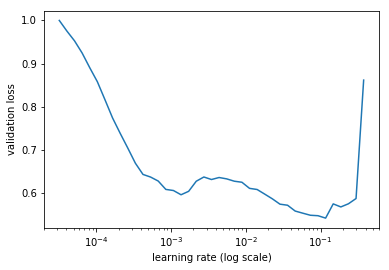

In [486]:
m.sched.plot(n_skip=5,n_skip_end=1)


In [487]:
lr = 1e-1

In [488]:
m.fit(lr, 1, metrics=[accuracy],cycle_len=1) #cross entropy


epoch      trn_loss   val_loss   accuracy                                                                              
    0      3.091503   2.006281   0.9252    



[array([2.00628]), 0.9252]

In [489]:
m.fit(lr, 1, metrics=[accuracy], cycle_len=1)


epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.659695   0.308839   0.9256    



[array([0.30884]), 0.9256]

In [349]:
lr = 1e-3

In [350]:
m.fit(lr, 3, metrics=[accuracy], cycle_len=1)


epoch      trn_loss   val_loss   accuracy                                                                              
    0      0.271109   0.264135   0.926     
    1      0.272276   0.264082   0.926                                                                                 
    2      0.269705   0.264079   0.926                                                                                 



[array([0.26408]), 0.926]

In [493]:
pred_test = m.predict_with_targs(is_test=True)

In [495]:
pred_test_pred = np.argmax(pred_test[0],axis=1)

In [503]:
len(pred_test_pred), len(pred_test[1])

(48744, 48744)

In [547]:
sum(pred_test_pred[:40000] -pred_test[1].reshape(-1)[:40000])/40000

0.1901

In [394]:
preds = torch.max(torch.Tensor(x),dim=1)

In [417]:
incorrect = torch.sum(torch.abs((preds[1] - torch.LongTensor(y))))

In [418]:
incorrect/len(y)

0.1008

In [425]:
torch.max(torch.Tensor(x),dim=1)

(
 -0.2517
 -0.5626
 -0.1586
    ⋮   
 -0.0435
 -0.0127
 -0.0589
 [torch.FloatTensor of size 2500], 
  0
  0
  0
 ⋮ 
  0
  0
  0
 [torch.LongTensor of size 2500])

In [434]:
y[3]

0

In [440]:
(y==0).sum()

2315

# RandomForest

In [465]:
from sklearn.ensemble import RandomForestClassifier

In [466]:
((val,trn), (y_val,y_trn)) = split_by_idx(val_idx, df.values, y)

In [471]:
m = RandomForestClassifier(n_estimators=40, max_features=0.99, min_samples_leaf=2,
                          n_jobs=-1, oob_score=True)
m.fit(trn, y_trn);

In [472]:
y_val.dtype

dtype('int64')

In [473]:
preds = m.predict(val)
m.score(trn, y_trn), m.score(val, y_val), m.oob_score_

(0.9816, 0.9256, 0.9204)

In [474]:
preds[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [477]:
def accur(x,y,df):
    return 1 - np.sum(np.abs(x-y))/df.shape[0]

In [478]:
accur(preds,y_val,df)

0.9814